In [1]:
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
folder_path = "C:\\Users\\Asus\\OneDrive\\文件\\MAGANG PDAM\\DRD_PDAM"
file_paths =  glob.glob(os.path.join(folder_path, "*.xlsx"))

data_list = []

for file in file_paths:
    df= pd.read_excel(file, sheet_name=0)
    df['sumber_file'] = os.path.basename(file)
    
    selected = df[['Nama', 'Tarif', 'Pakai', 'Total', 'Desa', 'Kecamatan','Sumber']]
    data_list.append(selected)
    
df_all = pd.concat(data_list, ignore_index = True)

df_all.head()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122755 entries, 0 to 1122754
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Nama       1118722 non-null  object
 1   Tarif      1122755 non-null  object
 2   Pakai      1122755 non-null  int64 
 3   Total      1122755 non-null  int64 
 4   Desa       1122755 non-null  object
 5   Kecamatan  1122755 non-null  object
 6   Sumber     1122755 non-null  object
dtypes: int64(2), object(5)
memory usage: 60.0+ MB


In [3]:
pelanggan_per_desa = df_all.groupby('Desa').size().reset_index(name='Jumlah_Pelanggan')
pelanggan_per_desa = pelanggan_per_desa.sort_values('Jumlah_Pelanggan')

In [4]:
pakai_per_desa = df_all.groupby('Desa')['Pakai'].mean().reset_index(name='Rata2_Pemakaian')

In [5]:
analisis = pd.merge(pelanggan_per_desa, pakai_per_desa, on='Desa')
analisis = analisis.sort_values('Jumlah_Pelanggan')  # bisa juga sort by Rata2_Pemakaian

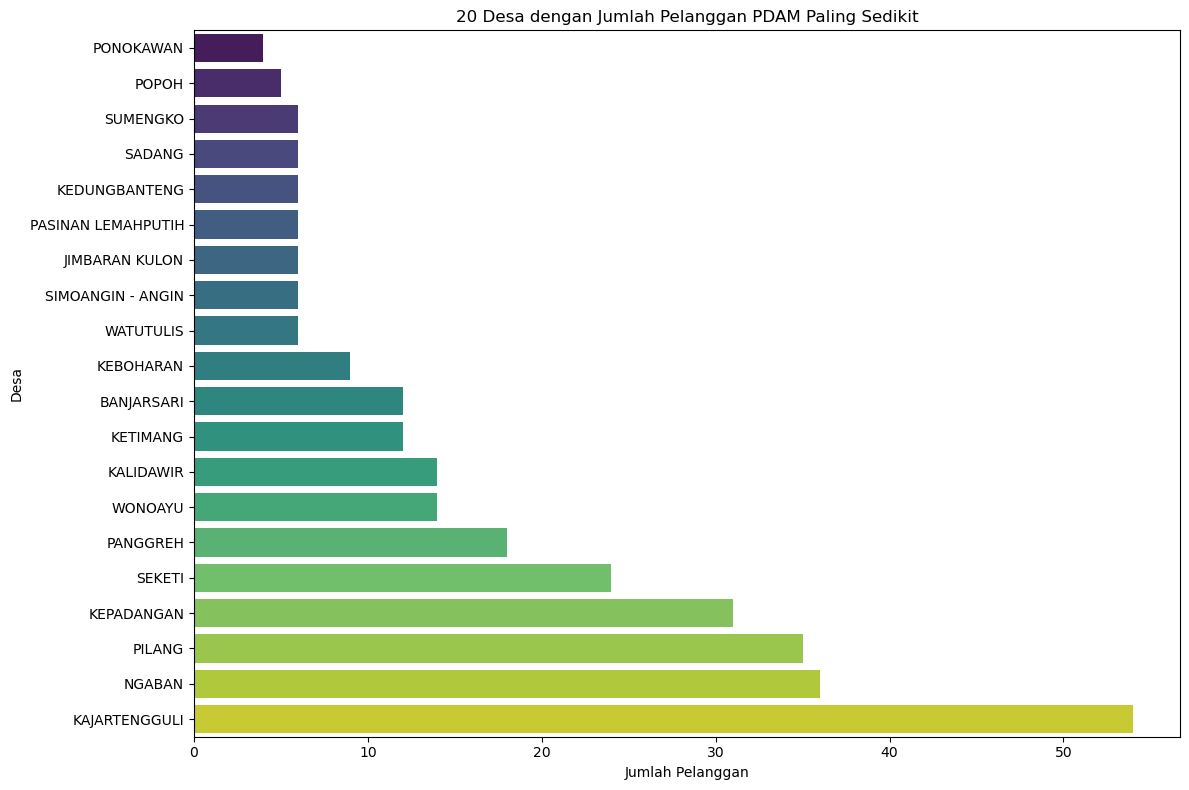

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
top_n = 20  # tampilkan 20 desa pelanggan paling sedikit
sns.barplot(
    data=analisis.head(top_n),
    x='Jumlah_Pelanggan',
    y='Desa',
    palette='viridis'
)
plt.title("20 Desa dengan Jumlah Pelanggan PDAM Paling Sedikit")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Desa")
plt.tight_layout()
plt.show()

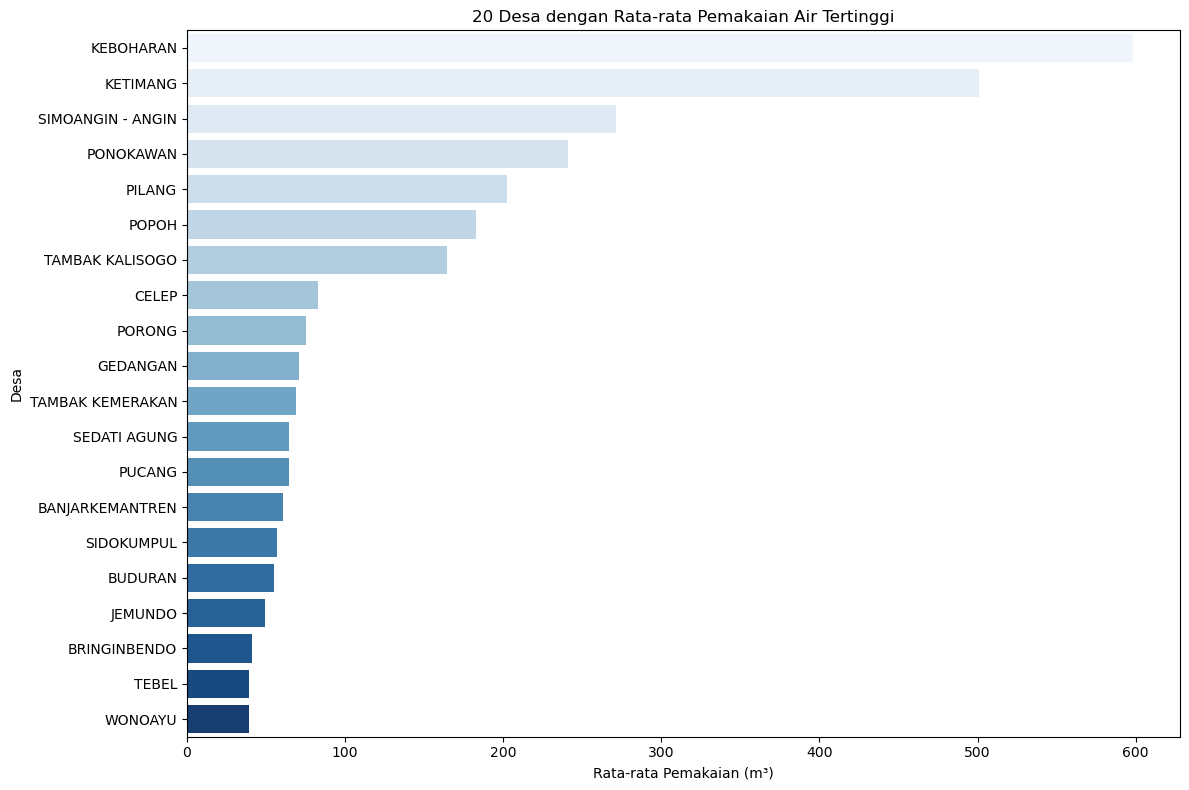

In [7]:
top_n = 20
pakai_sort = analisis.sort_values("Rata2_Pemakaian", ascending=False).head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x="Rata2_Pemakaian", y="Desa", data=pakai_sort, palette="Blues")
plt.title("20 Desa dengan Rata-rata Pemakaian Air Tertinggi")
plt.xlabel("Rata-rata Pemakaian (m³)")
plt.ylabel("Desa")
plt.tight_layout()
plt.show()

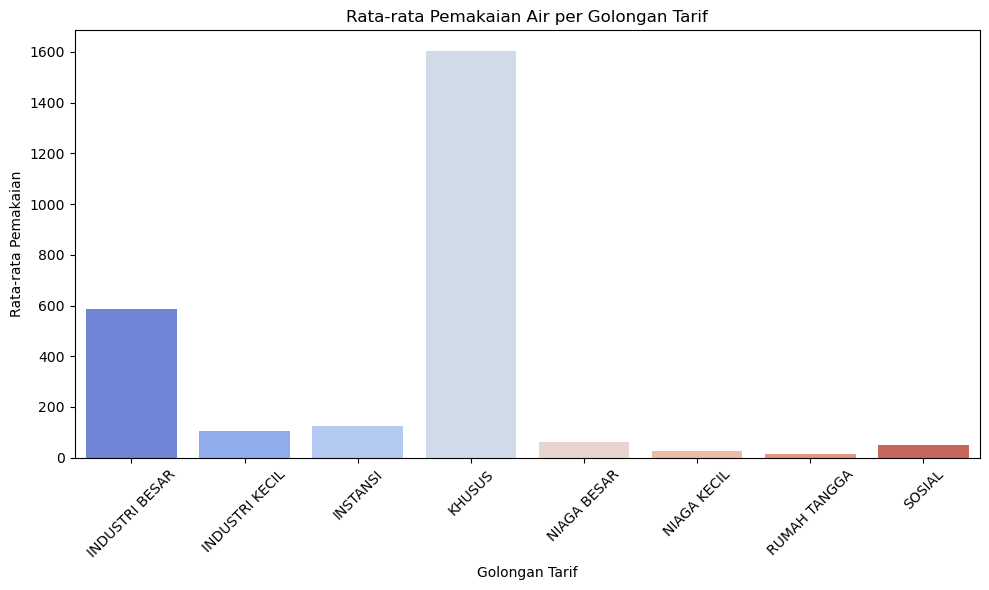

In [8]:
tarif_group = df_all.groupby("Tarif")["Pakai"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Tarif", y="Pakai", data=tarif_group, palette="coolwarm")
plt.title("Rata-rata Pemakaian Air per Golongan Tarif")
plt.xlabel("Golongan Tarif")
plt.ylabel("Rata-rata Pemakaian")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

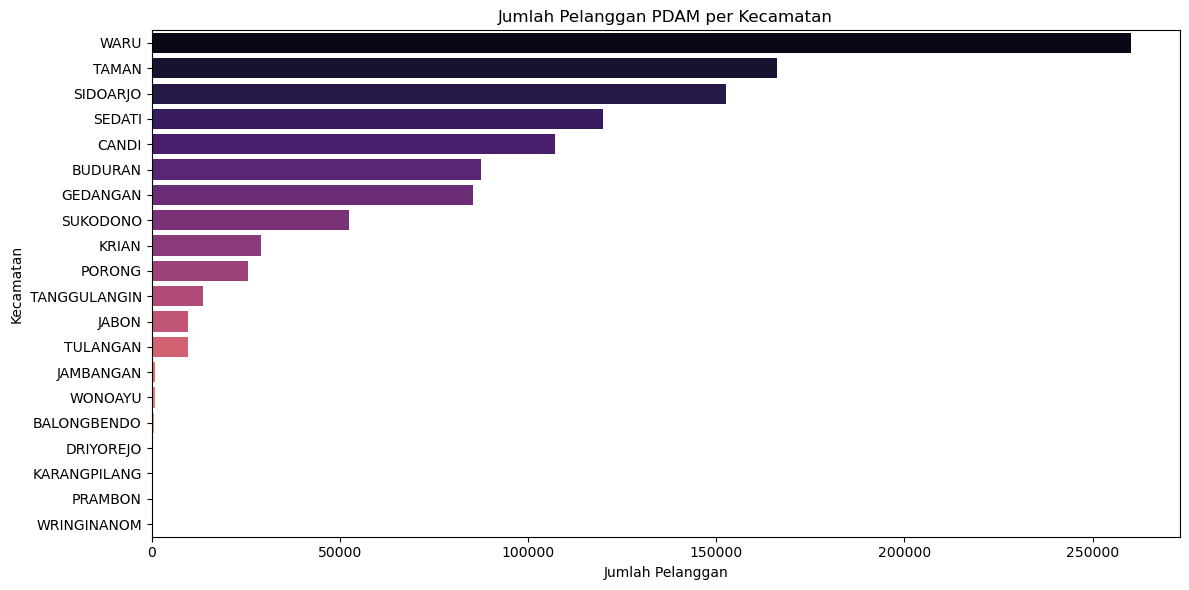

In [9]:
pelanggan_kecamatan = df_all.groupby("Kecamatan").size().reset_index(name="Jumlah_Pelanggan")
pelanggan_kecamatan = pelanggan_kecamatan.sort_values("Jumlah_Pelanggan", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Jumlah_Pelanggan", y="Kecamatan", data=pelanggan_kecamatan, palette="magma")
plt.title("Jumlah Pelanggan PDAM per Kecamatan")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kecamatan")
plt.tight_layout()
plt.show()

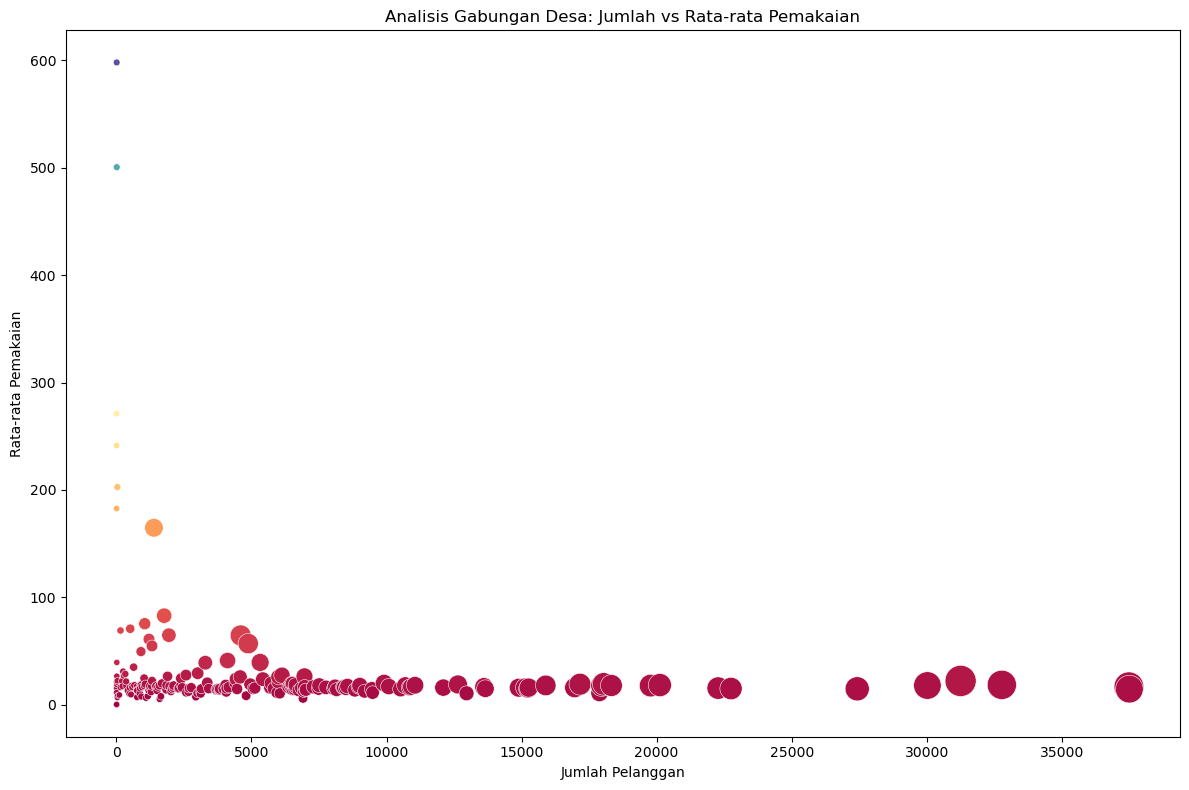

In [10]:
analisis["Total_Pakai"] = analisis["Jumlah_Pelanggan"] * analisis["Rata2_Pemakaian"]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=analisis,
    x="Jumlah_Pelanggan",
    y="Rata2_Pemakaian",
    size="Total_Pakai",
    hue="Rata2_Pemakaian",
    palette="Spectral",
    sizes=(20, 500),
    legend=False
)
plt.title("Analisis Gabungan Desa: Jumlah vs Rata-rata Pemakaian")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Rata-rata Pemakaian")
plt.tight_layout()
plt.show()

In [11]:
def rekomendasi(row):
    if row['Jumlah_Pelanggan'] < 20 and row['Rata2_Pemakaian'] > 100:
        return "Potensi tinggi"
    elif row['Jumlah_Pelanggan'] < 20 and row['Rata2_Pemakaian'] < 50:
        return "Perlu investigasi"
    else:
        return "Cakupan bagus"

analisis["Rekomendasi"] = analisis.apply(rekomendasi, axis=1)

In [12]:
# Tampilkan hasil rekomendasi
print(analisis[['Desa', 'Jumlah_Pelanggan', 'Rata2_Pemakaian', 'Rekomendasi']].sort_values('Rekomendasi'))

                  Desa  Jumlah_Pelanggan  Rata2_Pemakaian     Rekomendasi
99               GELAM              3290        39.021581   Cakupan bagus
126             KEMIRI              5727        19.913393   Cakupan bagus
127         KEBONAGUNG              5816        14.999312   Cakupan bagus
128      KARANGTANJUNG              5932        11.175826   Cakupan bagus
129            MEDAENG              5997        21.427714   Cakupan bagus
..                 ...               ...              ...             ...
1                POPOH                 5       182.600000  Potensi tinggi
10            KETIMANG                12       500.583333  Potensi tinggi
9            KEBOHARAN                 9       598.111111  Potensi tinggi
7    SIMOANGIN - ANGIN                 6       271.000000  Potensi tinggi
0            PONOKAWAN                 4       241.250000  Potensi tinggi

[199 rows x 4 columns]


In [13]:
# Tampilkan hanya desa dengan potensi tinggi
potensi_tinggi = analisis[analisis['Rekomendasi'] == 'Potensi tinggi']
print(potensi_tinggi[['Desa', 'Jumlah_Pelanggan', 'Rata2_Pemakaian', 'Rekomendasi']])

                 Desa  Jumlah_Pelanggan  Rata2_Pemakaian     Rekomendasi
0           PONOKAWAN                 4       241.250000  Potensi tinggi
1               POPOH                 5       182.600000  Potensi tinggi
7   SIMOANGIN - ANGIN                 6       271.000000  Potensi tinggi
9           KEBOHARAN                 9       598.111111  Potensi tinggi
10           KETIMANG                12       500.583333  Potensi tinggi


In [21]:
df_all.to_csv("data_gabungan.csv", index=False)

2025-08-01 08:19:10.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 08:19:10.758 No runtime found, using MemoryCacheStorageManager
2025-08-01 08:19:10.761 No runtime found, using MemoryCacheStorageManager
2025-08-01 08:19:10.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 08:19:10.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 08:19:10.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 08:19:11.324 Thread 'Thread-8': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 08:19:11.336 Thread 'Thread-8': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 08:19:13.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored w

DeltaGenerator()

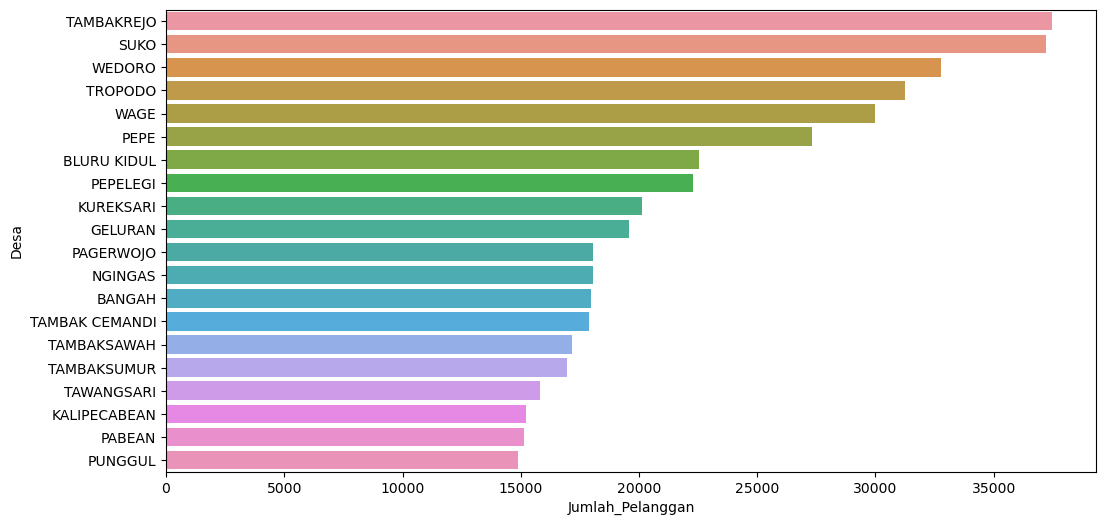

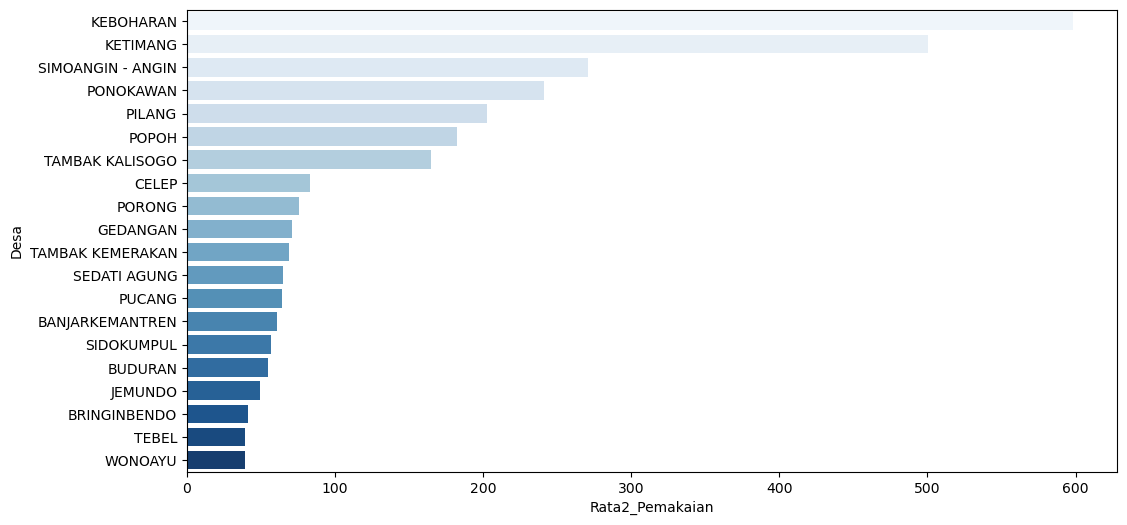

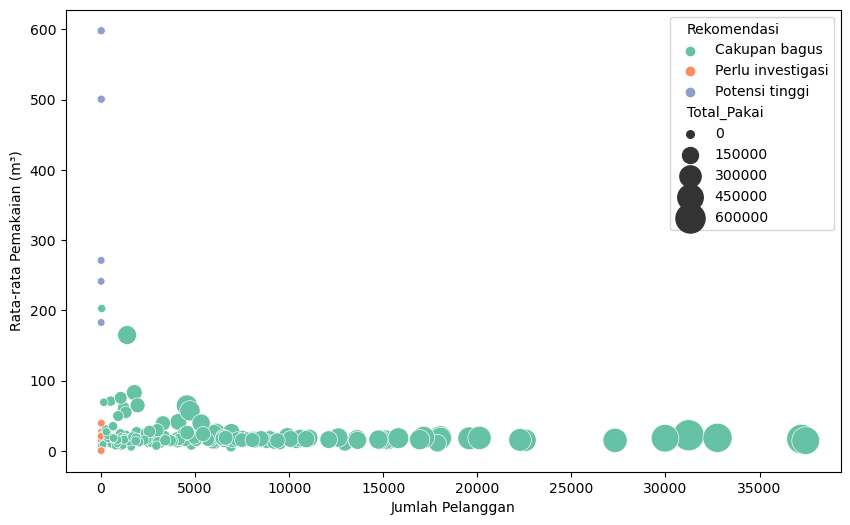

In [23]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Analisis PDAM Sidoarjo", layout="wide")

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv("C:\\Users\\Asus\\App.py\\data\\data_gabungan.csv")
    return df

df = load_data()

st.title("📊 Analisis Data Pelanggan PDAM Sidoarjo (Jan–Jun 2025)")
st.markdown("Visualisasi dan insight berbasis data untuk mendukung pengambilan keputusan.")

# Sidebar filter
desa_list = sorted(df['Desa'].dropna().unique())
kecamatan_list = sorted(df['Kecamatan'].dropna().unique())

st.sidebar.header("🔍 Filter Data")
selected_desa = st.sidebar.multiselect("Pilih Desa:", desa_list)
selected_kecamatan = st.sidebar.multiselect("Pilih Kecamatan:", kecamatan_list)

filtered = df.copy()
if selected_desa:
    filtered = filtered[filtered['Desa'].isin(selected_desa)]
if selected_kecamatan:
    filtered = filtered[filtered['Kecamatan'].isin(selected_kecamatan)]

# Analisis agregat
agg = (
    filtered.groupby("Desa")
    .agg(Jumlah_Pelanggan=('Nama', 'count'),
         Rata2_Pemakaian=('Pakai', 'mean'))
    .reset_index()
)

# Rekomendasi
def rekomendasi(row):
    if row['Jumlah_Pelanggan'] < 20 and row['Rata2_Pemakaian'] > 100:
        return "Potensi tinggi"
    elif row['Jumlah_Pelanggan'] < 20 and row['Rata2_Pemakaian'] < 50:
        return "Perlu investigasi"
    else:
        return "Cakupan bagus"

agg['Rekomendasi'] = agg.apply(rekomendasi, axis=1)

st.subheader("📋 Tabel Analisis per Desa")
st.dataframe(agg, use_container_width=True)

# Visualisasi
st.subheader("📉 Jumlah Pelanggan per Desa")
fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=agg.sort_values("Jumlah_Pelanggan", ascending=False).head(20), 
            x="Jumlah_Pelanggan", y="Desa", ax=ax1)
st.pyplot(fig1)

st.subheader("💧 Rata-rata Pemakaian Air per Desa")
fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.barplot(data=agg.sort_values("Rata2_Pemakaian", ascending=False).head(20), 
            x="Rata2_Pemakaian", y="Desa", ax=ax2, palette="Blues")
st.pyplot(fig2)

st.subheader("🧠 Scatter Plot Potensi Wilayah")
agg["Total_Pakai"] = agg["Jumlah_Pelanggan"] * agg["Rata2_Pemakaian"]
fig3, ax3 = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=agg, x="Jumlah_Pelanggan", y="Rata2_Pemakaian", 
                size="Total_Pakai", hue="Rekomendasi", ax=ax3, palette="Set2", sizes=(30, 500))
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Rata-rata Pemakaian (m³)")
st.pyplot(fig3)